In [1]:
import netCDF4
import numpy as np
import datetime as dt
import glob
import matplotlib.pyplot as plt


In [2]:
def trunca(values, decs=0):
    return np.trunc(values*10**decs)/(10**decs)

def mincoords(latitude,longitude,lat,lon):
    londiff=trunca(abs(lon-longitude),4)
    latdiff=trunca(abs(lat-latitude),4)
    minlondiff=np.amin(londiff)
    minlatdiff=np.amin(latdiff)
    minlon_index=np.where(londiff==minlondiff)
    minlat_index=np.where(latdiff==minlatdiff)
    lat_index=int(minlat_index[0])
    lon_index=int(minlon_index[0])
    return lat_index,lon_index

def posixzero(filename):
    date = dt.datetime.strptime(filename[-15:-7],'%Y%m%d')
    t0 = dt.datetime.utcfromtimestamp(0.0)
    time_zero = (date-t0).total_seconds()+30*60
    return time_zero

def posixconverter(time_zero,time):
    posix=[]
    for ele in time:
        tposix = time_zero+ele*60
        posix.append(tposix)
    return posix

def posixtodt(epoch):
    dtime = []
    for ele in epoch:
        dtime.append(dt.datetime.utcfromtimestamp(ele))
    return dtime

In [12]:
latitude=19.1187
longitude=-98.6552
files = glob.glob('D:\\CCA\\NASAGESDISC\\MERRA2\\*.nc')

for file in files:
    
    dset = netCDF4.Dataset(file)
    ozone_mat=np.copy(dset['TO3'])
    lat=np.copy(dset['lat'])
    lon=np.copy(dset['lon'])
    time=np.copy(dset['time'])
    dset.close()
    
    time_zero = posixzero(file)
    epoch = posixconverter(time_zero,time)
    dtime = posixtodt(epoch)
    
    lai,loi=mincoords(latitude,longitude,lat,lon)
    #print(lat[lai],lon[loi])
    ozone = []
    
    for ii,ele in enumerate(dtime):
        ozone.append(ozone_mat[ii,lai,loi])
    
    inter_mat = np.concatenate((np.array(dtime,ndmin=2).T,np.array(ozone,ndmin=2).T),axis=1)
    
    try:
        datamat = np.concatenate((datamat,inter_mat),axis=0)
    except:
        datamat = np.copy(inter_mat)
        


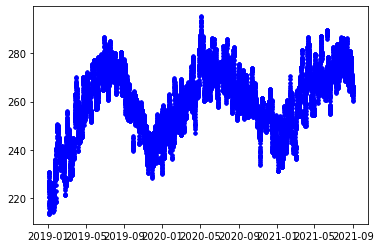

In [13]:
plt.plot(datamat[:,0],datamat[:,1],'.b')

In [14]:
print(lat[lai],lon[loi])

19.0 -98.75


In [15]:
np.savez('MERRA19-9875.npz',dtime=datamat[:,0],ozone=datamat[:,1])